# CREDIT CARD SEGMENTATION

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
cc=pd.read_csv('G:/AnalytixLab/PYTHON & Machine learning/Assignment/M.L assignments/Unsupervised Learning (Segmentation)/Segmentation of Credit Card Customers/CC_GENERAL.csv')

In [3]:
cc.head(2)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.4,0.0,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.0,0.0,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12


In [ ]:
# import pandas_profiling as PP
# PP.ProfileReport(cc)

In [4]:
cc.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

In [5]:
# Checking presence of NULL-values
t=cc.shape[0]
(cc.isnull().sum().sort_values(ascending=False).head(4)/t)*100

MINIMUM_PAYMENTS       3.497207
CREDIT_LIMIT           0.011173
TENURE                 0.000000
PURCHASES_FREQUENCY    0.000000
dtype: float64

Exploratory Analysis( Derrivation of KPIs (Key performance indices) )

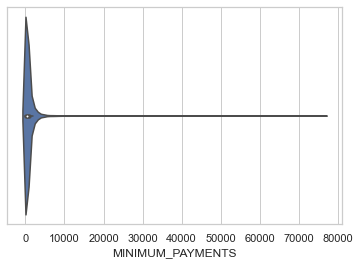

In [32]:
sns.violinplot(x=cc['MINIMUM_PAYMENTS'])

Monthly average purchase amount: 748223.605
Monthly average cash-advance amount: 730074.7047138334


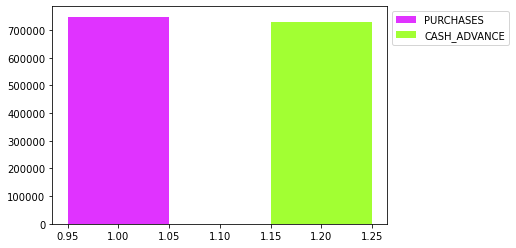

In [29]:
a=cc['PURCHASES'].sum()/12
b=cc['CASH_ADVANCE'].sum()/12
print(f'Monthly average purchase amount: {a}')
print(f'Monthly average cash-advance amount: {b}')
bar_width=0.1
# ind=np.arange(1,3)
plt.bar(1,a,color='#e033ff',label='PURCHASES',width=bar_width)
plt.bar(1.1+bar_width,b,color='#a2ff33',label='CASH_ADVANCE',width=bar_width)
plt.legend(bbox_to_anchor=(1.0,1.0))

Total One-off-purchase: 7765279.7299999995
Total Installment-purchase: 7504296.84


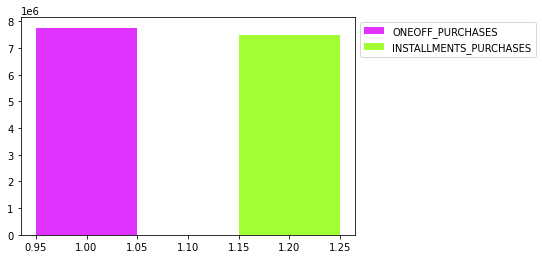

In [28]:
purchase_1off=cc.loc[cc['ONEOFF_PURCHASES']>0]['PURCHASES'].sum()
purchase_installment=cc.loc[cc['INSTALLMENTS_PURCHASES']>0]['PURCHASES'].sum()
print(f'Total One-off-purchase: {purchase_1off}')
print(f'Total Installment-purchase: {purchase_installment}')
bar_width=0.1
# ind=np.arange(1,3)
plt.bar(1,purchase_1off,color='#e033ff',label='ONEOFF_PURCHASES',width=bar_width)
plt.bar(1.1+bar_width,purchase_installment,color='#a2ff33',label='INSTALLMENTS_PURCHASES',width=bar_width)
plt.legend(bbox_to_anchor=(1.0,1.0))

In [11]:
average_purchase=cc['PURCHASES'].sum()/((cc['PURCHASES_FREQUENCY'].sum())*12)
print(f'Average amount per purchase: {average_purchase}')

Average amount per purchase: 170.49109676640663


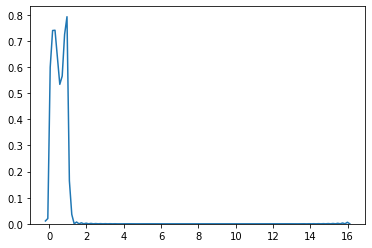

In [24]:
bal_cred_ratio=cc['BALANCE']/cc['CREDIT_LIMIT']
sns.distplot(bal_cred_ratio,hist = False) # Density-plot

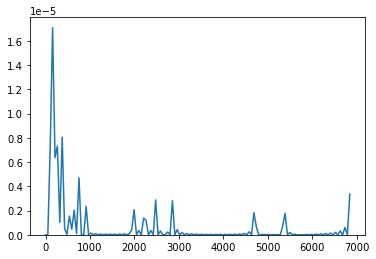

In [25]:
payment_minPayment_ratio=cc['PAYMENTS']/cc['MINIMUM_PAYMENTS']
sns.distplot(payment_minPayment_ratio,hist = False)  # Density-plot

Predictive-Modelling

In [5]:
cc1=cc.copy()

In [6]:
# Drop categorical variables
cc1.drop('CUST_ID',axis=1,inplace=True)

In [7]:
def contimous_var_summary(x):
    return pd.Series([x.count(),x.isnull().sum(),x.sum(),x.mean(),x.median(),x.std(),x.var(),x.min(),
                      x.dropna().quantile(0.01),x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),
                      x.dropna().quantile(0.50),x.dropna().quantile(0.75),x.dropna().quantile(0.90),x.dropna().quantile(0.95),
                      x.dropna().quantile(0.99),x.max()],index=['N','NMISS','SUM','MEAN','MEDIAN','St~DEV','VAR','MIN','P1',
                                                                'P5','P10','P25','P50','P75','P90','P95','P99','MAX'])
cc1.apply(lambda a:contimous_var_summary(a)).T.round(2)

,N,NMISS,SUM,MEAN,MEDIAN,St~DEV,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
BALANCE,8950.0,0.0,14002049.71,1564.47,873.39,2081.53,4332774.97,0.00,0.07,8.81,23.58,128.28,873.39,2054.14,4338.56,5909.11,9338.80,19043.14
BALANCE_FREQUENCY,8950.0,0.0,7851.57,0.88,1.00,0.24,0.06,0.00,0.09,0.27,0.45,0.89,1.00,1.00,1.00,1.00,1.00,1.00
PURCHASES,8950.0,0.0,8978683.26,1003.20,361.28,2136.63,4565208.19,0.00,0.00,0.00,0.00,39.64,361.28,1110.13,2542.62,3998.62,8977.29,49039.57
ONEOFF_PURCHASES,8950.0,0.0,5302314.47,592.44,38.00,1659.89,2755227.90,0.00,0.00,0.00,0.00,0.00,38.00,577.41,1600.10,2671.09,6689.90,40761.25
INSTALLMENTS_PURCHASES,8950.0,0.0,3679055.42,411.07,89.00,904.34,817827.43,0.00,0.00,0.00,0.00,0.00,89.00,468.64,1140.07,1750.09,3886.24,22500.00
CASH_ADVANCE,8950.0,0.0,8760896.46,978.87,0.00,2097.16,4398096.33,0.00,0.00,0.00,0.00,0.00,0.00,1113.82,3065.53,4647.17,9588.16,47137.21
PURCHASES_FREQUENCY,8950.0,0.0,4388.64,0.49,0.50,0.40,0.16,0.00,0.00,0.00,0.00,0.08,0.50,0.92,1.00,1.00,1.00,1.00
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.0,1812.00,0.20,0.08,0.30,0.09,0.00,0.00,0.00,0.00,0.00,0.08,0.30,0.75,1.00,1.00,1.00
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.0,3261.71,0.36,0.17,0.40,0.16,0.00,0.00,0.00,0.00,0.00,0.17,0.75,1.00,1.00,1.00,1.00
CASH_ADVANCE_FREQUENCY,8950.0,0.0,1209.54,0.14,0.00,0.20,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.22,0.42,0.58,0.83,1.50


In [8]:
# Outlier-handling
cc1=cc1.apply(lambda x: x.clip(lower=x.quantile(0.01),upper=x.quantile(0.99)))

In [9]:
def data_amputation(x):
    x=x.fillna(x.mean())
    return x
cc1=cc1.apply(lambda x:data_amputation(x))

In [10]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
cc_scaled=sc.fit_transform(cc1)
cc_scaled

array([[-0.76285553, -0.25596817, -0.55132729, ..., -0.49991713,
        -0.52555097,  0.36067954],
       [ 0.84486711,  0.13250091, -0.61388057, ...,  0.24290272,
         0.2342269 ,  0.36067954],
       [ 0.48518086,  0.52096999, -0.10691708, ..., -0.11149825,
        -0.52555097,  0.36067954],
       ...,
       [-0.7717557 , -0.19122546, -0.51919825, ..., -0.54537945,
         0.32919999, -4.12276757],
       [-0.77681097, -0.19122546, -0.61388057, ..., -0.56661119,
         0.32919999, -4.12276757],
       [-0.59412458, -0.90341664,  0.10295769, ..., -0.54070466,
        -0.52555097, -4.12276757]])

In [11]:
from sklearn.decomposition import PCA
pc=PCA(n_components=17)
pc.fit_transform(cc_scaled)

array([[-1.76425313e+00, -1.42357677e+00,  2.20599794e-01, ...,
         1.38740338e-01,  5.83774612e-02, -6.24589040e-03],
       [-1.53633875e+00,  2.70560901e+00,  5.93655339e-01, ...,
        -4.63907735e-01, -7.45543808e-02,  7.15472215e-03],
       [ 1.03358505e+00, -2.91647108e-01,  9.18082741e-01, ...,
         1.47136620e-01,  4.26440806e-01, -1.06784027e-02],
       ...,
       [-9.36027575e-01, -2.06122670e+00, -7.41893123e-01, ...,
         3.42027485e-01,  1.31963370e-01, -1.24226693e-03],
       [-2.49610573e+00, -1.09647903e+00,  6.79869421e-01, ...,
         1.22800156e-01, -1.51685644e-01,  1.22926825e-02],
       [-4.38996926e-01, -6.13610447e-01,  1.40190661e+00, ...,
        -5.49633642e-01,  3.80671383e-01, -2.26628286e-02]])

In [13]:
var1=np.cumsum(np.round(pc.explained_variance_ratio_,decimals=4)*100)
pd.DataFrame({'Eigen_Values':pc.explained_variance_,'Cumm_variance':var1},index=range(1,18))

,Eigen_Values,Cumm_variance
1,4.986533,29.33
2,3.728449,51.26
3,1.469803,59.90
4,1.277395,67.41
5,1.064924,73.67
6,0.930992,79.15
7,0.759980,83.62
8,0.645698,87.42
9,0.574994,90.80
10,0.442824,93.40


6th row gives eigen value approximately equals to 1. So we'll take 6 components.

In [14]:
pc_final=PCA(n_components=6).fit_transform(cc_scaled)
pc_final

array([[-1.76425313, -1.42357677,  0.22059979, -0.68882087, -0.04032419,
        -0.13905696],
       [-1.53633875,  2.70560901,  0.59365534,  0.31368   ,  1.30663728,
        -0.64639415],
       [ 1.03358505, -0.29164711,  0.91808274, -1.49428611, -1.54743985,
        -0.41782618],
       ...,
       [-0.93602757, -2.0612267 , -0.74189312,  2.31544006, -1.18892906,
         2.83518372],
       [-2.49610573, -1.09647903,  0.67986942,  2.01137845, -1.38953457,
         2.75160855],
       [-0.43899693, -0.61361045,  1.40190661,  2.00164853, -2.76881371,
         3.11191068]])

In [15]:
from factor_analyzer import FactorAnalyzer
corrm=pd.DataFrame(cc_scaled).corr()
fa=FactorAnalyzer(n_factors=6,rotation='varimax',method='principal').fit(corrm)
loadings=pd.DataFrame(fa.loadings_,columns=['Fctr1','Fctr2','Fctr3','Fctr4','Fctr5','Fctr6'])

In [17]:
#loadings.to_excel(r'C:\Users\Himanshu Shekhar Pal\Desktop\load_matrixl.xlsx',index=False)

In [13]:
# Modelling with selected variables on the basis of business-logic + factor-loading(i.e. load matrix)

list_var=['PURCHASES_INSTALLMENTS_FREQUENCY','PURCHASES_FREQUENCY','CASH_ADVANCE_FREQUENCY','BALANCE','PURCHASES',
          'BALANCE_FREQUENCY','CREDIT_LIMIT','TENURE']
cc_scaled_datframe=pd.DataFrame(cc_scaled,columns=cc1.columns)
final_vars=cc_scaled_datframe[list_var]

In [14]:
km_3=KMeans(n_clusters=3,random_state=786).fit(final_vars)
km_4=KMeans(n_clusters=4,random_state=786).fit(final_vars)
km_5=KMeans(n_clusters=5,random_state=786).fit(final_vars)
km_6=KMeans(n_clusters=6,random_state=786).fit(final_vars)
km_7=KMeans(n_clusters=7,random_state=786).fit(final_vars)
km_8=KMeans(n_clusters=8,random_state=786).fit(final_vars)
km_9=KMeans(n_clusters=9,random_state=786).fit(final_vars)

Evaluation of clusters: 

Quantitative Evaluation.

In [15]:
print(pd.Series(km_3.labels_).value_counts()/sum(pd.Series(km_3.labels_).value_counts()));print('\n')
print(pd.Series(km_4.labels_).value_counts()/sum(pd.Series(km_4.labels_).value_counts()));print('\n')
print(pd.Series(km_5.labels_).value_counts()/sum(pd.Series(km_5.labels_).value_counts()));print('\n')
print(pd.Series(km_6.labels_).value_counts()/sum(pd.Series(km_6.labels_).value_counts()));print('\n')
print(pd.Series(km_7.labels_).value_counts()/sum(pd.Series(km_7.labels_).value_counts()));print('\n')
print(pd.Series(km_8.labels_).value_counts()/sum(pd.Series(km_8.labels_).value_counts()));print('\n')
print(pd.Series(km_9.labels_).value_counts()/sum(pd.Series(km_9.labels_).value_counts()));print('\n')

0    0.464469
2    0.391620
1    0.143911
dtype: float64


1    0.376313
3    0.350726
0    0.158436
2    0.114525
dtype: float64


1    0.347933
0    0.326145
2    0.141788
4    0.107933
3    0.076201
dtype: float64


1    0.316425
0    0.296313
2    0.138659
4    0.110056
3    0.074302
5    0.064246
dtype: float64


5    0.236872
0    0.227598
1    0.172179
2    0.127933
6    0.099330
3    0.074525
4    0.061564
dtype: float64


3    0.250615
1    0.202011
4    0.133184
6    0.131285
7    0.098771
0    0.074078
2    0.071732
5    0.038324
dtype: float64


8    0.236983
0    0.225251
3    0.128492
6    0.092961
1    0.090391
4    0.071620
2    0.064022
7    0.049274
5    0.041006
dtype: float64




We can see, when the number of clusters is 4,5,6 or 7 then segment-size is well ditributed i.e. <40% & >5%

In [16]:
# Silhoutte coefficient

from sklearn import metrics
k_range=range(2,13)
scores=[]
for k in k_range:
    km=KMeans(n_clusters=k,random_state=786)
    km.fit(final_vars)
    scores.append(metrics.silhouette_score(final_vars,km.labels_))
scores

[0.25692156186717763,
 0.2616016399446862,
 0.2782705870579851,
 0.3005581668537884,
 0.30893820474872763,
 0.2570439180801182,
 0.25461076159660284,
 0.2712495523903577,
 0.2460211023991924,
 0.25140344527301656,
 0.25120813798455005]

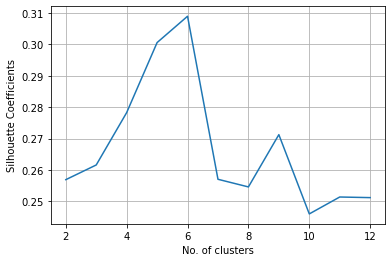

In [17]:
plt.plot(k_range,scores)
plt.xlabel('No. of clusters')
plt.ylabel('Silhouette Coefficients')
plt.grid('True')

Silhouette coefficient highest when number of clusters is 6.

In [18]:
# Elbow Analysis

cluster_range=range(2,20)
cluster_errors=[]
for num_clusters in cluster_range:
    clusters=KMeans(num_clusters)
    clusters.fit(final_vars)
    cluster_errors.append(clusters.inertia_)
clusters_df=pd.DataFrame({'num_clusters':cluster_range,'cluster_errors':cluster_errors})
clusters_df[0:10]

,num_clusters,cluster_errors
0,2,54564.988340
1,3,46121.623207
2,4,39652.935407
3,5,33665.163132
4,6,28550.388304
5,7,26690.827172
6,8,24875.975329
7,9,23513.142347
8,10,22333.972542
9,11,21183.772891


Text(0, 0.5, 'Errors')

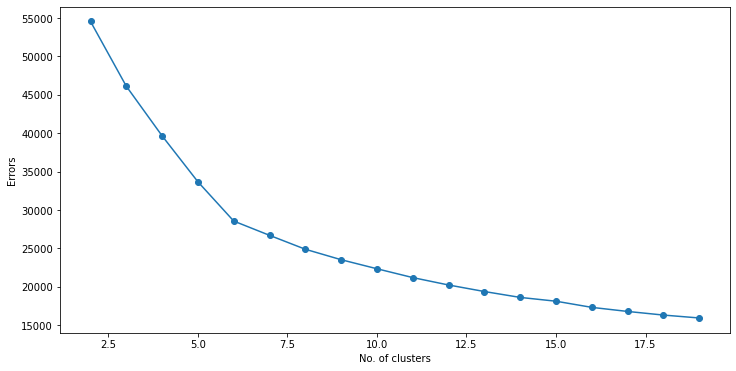

In [19]:
%matplotlib inline
plt.figure(figsize=(12,6))
plt.plot(clusters_df.num_clusters,clusters_df.cluster_errors,marker='o')
plt.xlabel('No. of clusters')
plt.ylabel('Errors')

We're observing decrease in variance is flattening out at around 6.

In [20]:
# Conactenating labels found through Kmeans with data

cluster_6=pd.concat([cc1[list_var],pd.Series(km_6.labels_,name='Cluster_6')],axis=1)
cluster_6

,PURCHASES_INSTALLMENTS_FREQUENCY,PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,BALANCE,PURCHASES,BALANCE_FREQUENCY,CREDIT_LIMIT,TENURE,Cluster_6
0,0.083333,0.166667,0.000000,40.900749,95.40,0.818182,1000.0,12,0
1,0.000000,0.000000,0.250000,3202.467416,0.00,0.909091,7000.0,12,0
2,0.000000,1.000000,0.000000,2495.148862,773.17,1.000000,7500.0,12,1
3,0.000000,0.083333,0.083333,1666.670542,1499.00,0.636364,7500.0,12,2
4,0.000000,0.083333,0.000000,817.714335,16.00,1.000000,1200.0,12,0
...,...,...,...,...,...,...,...,...,...
8945,0.833333,1.000000,0.000000,28.493517,291.12,1.000000,1000.0,6,3
8946,0.833333,1.000000,0.000000,19.183215,300.00,1.000000,1000.0,6,3
8947,0.666667,0.833333,0.000000,23.398673,144.40,0.833333,1000.0,6,3
8948,0.000000,0.000000,0.166667,13.457564,0.00,0.833333,500.0,6,3


In [21]:
# Mean value gives a good indication of the distribution of data.So we are finding mean value for each variable for each cluster

cluster_6=cluster_6.groupby('Cluster_6').apply(lambda x: x[list_var].mean()).T
cluster_6

Cluster_6,0,1,2,3,4,5
PURCHASES_INSTALLMENTS_FREQUENCY,0.048860,0.741388,0.188066,0.279261,0.188736,0.743521
PURCHASES_FREQUENCY,0.161158,0.888009,0.270054,0.421943,0.298415,0.933454
CASH_ADVANCE_FREQUENCY,0.157632,0.041191,0.035126,0.207227,0.445684,0.077148
BALANCE,1345.945733,838.218503,130.667405,942.289591,5306.024687,3189.339123
PURCHASES,276.332115,1152.495360,358.359807,429.641820,499.479401,5495.875652
BALANCE_FREQUENCY,0.971833,0.964409,0.383334,0.802511,0.990133,0.983776
CREDIT_LIMIT,3070.849902,4020.875778,3911.111559,2619.690856,8541.984310,9574.608696
TENURE,11.878959,11.888418,11.781628,7.264662,11.768528,11.939130


Above dataframe have values, some very high(in thousands) & some very low(in few of decimals) so to convert them on a same scale(for the sake of plotting), we will apply logarithm on the entire dataframe.
                                                                                                                              Any -ve values after logarithm will reflect, that quantity as a ratio(having value between 1 & 0)

In [23]:
u=cluster_6.apply(lambda x:np.log(x))
u

Cluster_6,0,1,2,3,4,5
PURCHASES_INSTALLMENTS_FREQUENCY,-3.018804,-0.299231,-1.670961,-1.275608,-1.667408,-0.296358
PURCHASES_FREQUENCY,-1.825367,-0.118773,-1.309135,-0.862885,-1.209271,-0.068864
CASH_ADVANCE_FREQUENCY,-1.847490,-3.189535,-3.348825,-1.573941,-0.808145,-2.562030
BALANCE,7.204852,6.731279,4.872655,6.848313,8.576598,8.067569
PURCHASES,5.621603,7.049685,5.881538,6.062952,6.213566,8.611753
BALANCE_FREQUENCY,-0.028572,-0.036240,-0.958849,-0.220009,-0.009916,-0.016357
CREDIT_LIMIT,8.029710,8.299255,8.271577,7.870812,9.052749,9.166870
TENURE,2.474769,2.475565,2.466541,1.983022,2.465429,2.479821


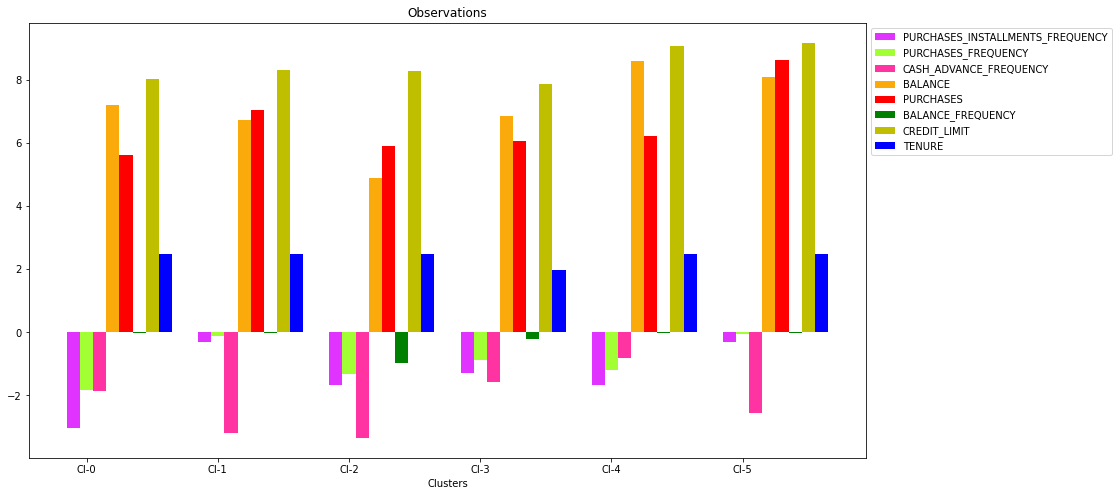

In [41]:
fig,ax=plt.subplots(figsize=(15,8))
index=np.arange(len(u.columns))

PURCHASES_INSTALLMENTS_FREQUENCY=u.loc['PURCHASES_INSTALLMENTS_FREQUENCY',:].values
PURCHASES_FREQUENCY=(u.loc['PURCHASES_FREQUENCY',:].values)
INSTALLMENTS_PURCHASES= u.loc['CASH_ADVANCE_FREQUENCY',:].values
PURCHASES_TRX=u.loc['BALANCE',:].values
PURCHASES=u.loc['PURCHASES',:].values
ONEOFF_PURCHASES_FREQUENCY=u.loc['BALANCE_FREQUENCY',:].values
ONEOFF_PURCHASES=u.loc['CREDIT_LIMIT',:].values
BALANCE_FREQUENCY=u.loc['TENURE',:].values

bar_width=.10
b1=plt.bar(index,PURCHASES_INSTALLMENTS_FREQUENCY,color='#e033ff',label='PURCHASES_INSTALLMENTS_FREQUENCY',width=bar_width)
b2=plt.bar(index+bar_width,PURCHASES_FREQUENCY,color='#a2ff33',label='PURCHASES_FREQUENCY',width=bar_width)
b3=plt.bar(index+2*bar_width,INSTALLMENTS_PURCHASES,color='#ff33a2',label='CASH_ADVANCE_FREQUENCY',width=bar_width)
b4=plt.bar(index+3*bar_width,PURCHASES_TRX,color='#faaa0b',label='BALANCE',width=bar_width)
b5=plt.bar(index+4*bar_width,PURCHASES,color='r',label='PURCHASES',width=bar_width)
b6=plt.bar(index+5*bar_width,ONEOFF_PURCHASES_FREQUENCY,color='g',label='BALANCE_FREQUENCY',width=bar_width)
b6=plt.bar(index+6*bar_width,ONEOFF_PURCHASES,color='y',label='CREDIT_LIMIT',width=bar_width)
b6=plt.bar(index+7*bar_width,BALANCE_FREQUENCY,color='b',label='TENURE',width=bar_width)
#b6=plt.bar(index+8*bar_width,CREDIT_LIMIT,color='#e033ff',label='CREDIT_LIMIT',width=bar_width)
#b6=plt.bar(index+9*bar_width,MINIMUM_PAYMENTS,color='#a2ff33',label='MINIMUM_PAYMENTS',width=bar_width)
#b6=plt.bar(index+10*bar_width,PAYMENTS,color='#ff33a2',label='PAYMENTS',width=bar_width)
#b6=plt.bar(index+11*bar_width,BALANCE,color='#faaa0b',label='BALANCE',width=bar_width)

plt.xlabel('Clusters')
plt.title('Observations')
plt.xticks(index + bar_width, ('Cl-0', 'Cl-1', 'Cl-2', 'Cl-3','Cl-4','Cl-5'))
plt.legend(bbox_to_anchor=(1.0,1.0)) #shift the legend slightly outside the axes boundaries

Strategic-Insights:-

Cluster 1: They've 3rd highest MAB(monthly average balance) and purchase quite a good amount, but not quite often i.e. their purchase frequency is quite low. They are 3rd on list in terms of cash-advance-frequency, so they're not so much inclined on installment purchase.They could be offered, offers such as reward-points on EMI-purchase, cashback on EMI-purchase, greater tunure of EMI(e.g. 18 months,24 months etc.) etc. so as to keep them spending or spend more, but at the same time in EMI's so that bank can earn quite a good interest on their loans. The've high balance-frequency but credit limit is 2nd lowest.

Cluster 2: These're the customers who purchase more than their MAB(monthly average balance). Their 'PURCHASES_INSTALLMENTS_FREQUENCY' is the highest i.e. whatever they purchase, mostly through EMI & purchase quite often (2nd in  this aspect); they may be offered credit limit enhancement so as to improve their MAB, no-cost EMI offers etc.

Cluster 3: They also spend more than their MAB(monthly average balance), but they are not frequent spender. Also they display poor balance frequency i.e. they quite often spend more than their balance & also they have worst cash-advance frequency. bUt their tenure as our customer is high. Their credit limit is also, 3rd lowest. 
They might be customers with low-earning & thereby spend only on essentials. They may be offered low interests in case of downpayment and cash-advance, handsome cashbacks on purchase of essentials such as grocery, payment of household bills etc.

Cluster 4: Their purchase frequency is 3rd highest, but neither they purchase through installments than through cash advancement. They purchase less than their monthly average balnce(MAB) despite having one of the lowest credit-limit. Their tenure as our customer is also the lowest so bank should avoid to provide them longer EMI plans they might default. They're 3rd largest EMI takers so should be offered with short-tenure no cost EMI options. Also in case they purchase anything through one-off payment they should be given option to convert them into EMI.

Cluster 5: One of the least spending cluster despite having highest credit-limit. They're also the loyalest customers displaying highest tenure. Their purchase frequency is 3rd lowest and mostly purchase through cash-advancement i.e. downpayment. So low interest on case of downpayment amy tend them spend more. As reflected from their high credit limit they're high income groups so offers such as conversion of spends on dining, airport-lounge, clubs etc. into EMI, 2x---Nx reward points on EMI purchase, convenience to cash those reward points at dining, fuel etc. will might tend them move more towards EMI spending. Their EMI tenure might be kept low so as to give us slightly better returns.

Cluster 6: They've the highest credit limit, highest purchase that too significantly through EMIs, but spend quite more than their MAB(monthly average balance). Also they're 2nd lowest in terms of tenure as our customers. So it's quite tough to retain them, but they are customers that give good returns. Goodies such as lifetime free credit cards, instant cash loans through credit-cards, greater EMI tenure (e.g. 18 months,24 months etc.), no-penalty on exceeding credit limit (upto a certain extent) etc. may be offered to them.

--------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------


Above-plot without taking logarithm on the entire dataframe(just for reference).

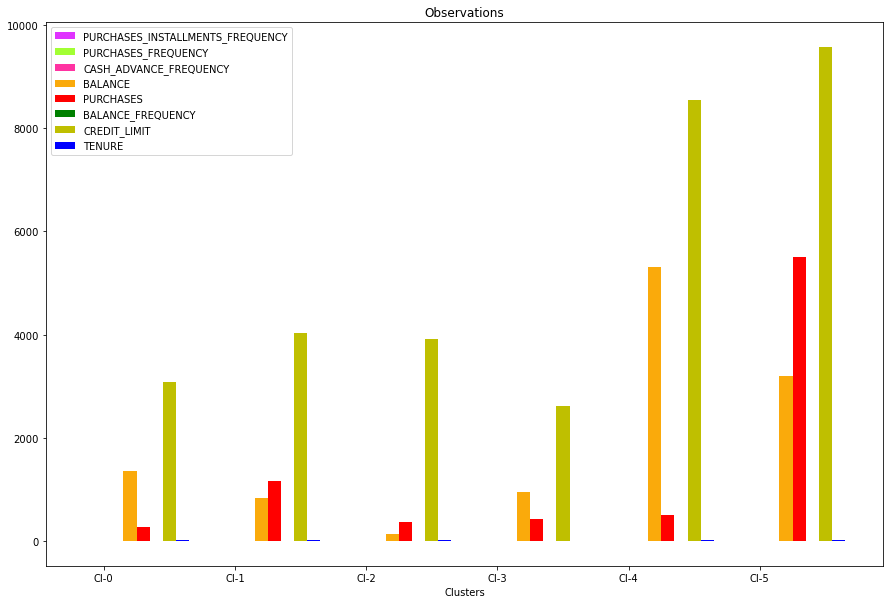

In [29]:
fig,ax=plt.subplots(figsize=(15,10))
index=np.arange(len(cluster_6.columns))

PURCHASES_INSTALLMENTS_FREQUENCY=np.log(cluster_6.loc['PURCHASES_INSTALLMENTS_FREQUENCY',:].values)
PURCHASES_FREQUENCY=(cluster_6.loc['PURCHASES_FREQUENCY',:].values)
INSTALLMENTS_PURCHASES= np.log(cluster_6.loc['CASH_ADVANCE_FREQUENCY',:].values)
PURCHASES_TRX=cluster_6.loc['BALANCE',:].values
PURCHASES=cluster_6.loc['PURCHASES',:].values
ONEOFF_PURCHASES_FREQUENCY=cluster_6.loc['BALANCE_FREQUENCY',:].values
ONEOFF_PURCHASES=cluster_6.loc['CREDIT_LIMIT',:].values
BALANCE_FREQUENCY=cluster_6.loc['TENURE',:].values

bar_width=.10
b1=plt.bar(index,PURCHASES_INSTALLMENTS_FREQUENCY,color='#e033ff',label='PURCHASES_INSTALLMENTS_FREQUENCY',width=bar_width)
b2=plt.bar(index+bar_width,PURCHASES_FREQUENCY,color='#a2ff33',label='PURCHASES_FREQUENCY',width=bar_width)
b3=plt.bar(index+2*bar_width,INSTALLMENTS_PURCHASES,color='#ff33a2',label='CASH_ADVANCE_FREQUENCY',width=bar_width)
b4=plt.bar(index+3*bar_width,PURCHASES_TRX,color='#faaa0b',label='BALANCE',width=bar_width)
b5=plt.bar(index+4*bar_width,PURCHASES,color='r',label='PURCHASES',width=bar_width)
b6=plt.bar(index+5*bar_width,ONEOFF_PURCHASES_FREQUENCY,color='g',label='BALANCE_FREQUENCY',width=bar_width)
b6=plt.bar(index+6*bar_width,ONEOFF_PURCHASES,color='y',label='CREDIT_LIMIT',width=bar_width)
b6=plt.bar(index+7*bar_width,BALANCE_FREQUENCY,color='b',label='TENURE',width=bar_width)
#b6=plt.bar(index+8*bar_width,CREDIT_LIMIT,color='#e033ff',label='CREDIT_LIMIT',width=bar_width)
#b6=plt.bar(index+9*bar_width,MINIMUM_PAYMENTS,color='#a2ff33',label='MINIMUM_PAYMENTS',width=bar_width)
#b6=plt.bar(index+10*bar_width,PAYMENTS,color='#ff33a2',label='PAYMENTS',width=bar_width)
#b6=plt.bar(index+11*bar_width,BALANCE,color='#faaa0b',label='BALANCE',width=bar_width)

plt.xlabel('Clusters')
plt.title('Observations')
plt.xticks(index + bar_width, ('Cl-0', 'Cl-1', 'Cl-2', 'Cl-3','Cl-4','Cl-5'))
plt.legend()